In [2]:
import datetime as dt
from pathlib import Path
import requests
import pandas as pd
import numpy as np
from math import floor
from termcolor import colored as cl
import matplotlib.pyplot as plt
plt.close('all')
import yfinance as yf
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [3]:
csv_path = Path("Resources/SQ Hourly Close.csv")
sq_1hr = pd.read_csv(csv_path, index_col=0, infer_datetime_format=True)
sq_1hr.reset_index(inplace=True)
sq_1hr.rename(columns = {'index':'Datetime'}, inplace = True)
sq_1hr.set_index(pd.to_datetime(sq_1hr['Datetime'],infer_datetime_format=True),inplace=True)
sq_1hr.head()

,Datetime,Close
Datetime,,
2019-09-03 09:30:00-04:00,2019-09-03 09:30:00-04:00,62.959999
2019-09-03 10:30:00-04:00,2019-09-03 10:30:00-04:00,62.320000
2019-09-03 11:30:00-04:00,2019-09-03 11:30:00-04:00,62.000000
2019-09-03 12:30:00-04:00,2019-09-03 12:30:00-04:00,61.774899
2019-09-03 13:30:00-04:00,2019-09-03 13:30:00-04:00,61.360001


In [12]:
sq_diff = sq_1hr['Close'].diff()
up = sq_diff.clip(lower=0)
down = -1*sq_diff.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
rs

Datetime
2019-09-03 09:30:00-04:00         NaN
2019-09-03 10:30:00-04:00    0.000000
2019-09-03 11:30:00-04:00    0.000000
2019-09-03 12:30:00-04:00    0.000000
2019-09-03 13:30:00-04:00    0.000000
                               ...   
2021-08-06 11:30:00-04:00    1.346707
2021-08-06 12:30:00-04:00    1.181926
2021-08-06 13:30:00-04:00    1.153673
2021-08-06 14:30:00-04:00    1.138587
2021-08-06 15:30:00-04:00    1.063259
Name: Close, Length: 3397, dtype: float64

In [13]:
sq_1hr['RSI'] = 100 - (100/(1 + rs))
sq_1hr['RSI'] 

Datetime
2019-09-03 09:30:00-04:00          NaN
2019-09-03 10:30:00-04:00     0.000000
2019-09-03 11:30:00-04:00     0.000000
2019-09-03 12:30:00-04:00     0.000000
2019-09-03 13:30:00-04:00     0.000000
                               ...    
2021-08-06 11:30:00-04:00    57.387102
2021-08-06 12:30:00-04:00    54.168932
2021-08-06 13:30:00-04:00    53.567697
2021-08-06 14:30:00-04:00    53.240155
2021-08-06 15:30:00-04:00    51.532994
Name: RSI, Length: 3397, dtype: float64

In [14]:

# sq_1hr['RSI’]
sq_1hr_rsi= sq_1hr.iloc[14:]
sq_1hr_rsi= sq_1hr.iloc[: , 1:]
sq_1hr_rsi

,Close,RSI
Datetime,,
2019-09-03 09:30:00-04:00,62.959999,NaN
2019-09-03 10:30:00-04:00,62.320000,0.000000
2019-09-03 11:30:00-04:00,62.000000,0.000000
2019-09-03 12:30:00-04:00,61.774899,0.000000
2019-09-03 13:30:00-04:00,61.360001,0.000000
...,...,...
2021-08-06 11:30:00-04:00,278.640015,57.387102
2021-08-06 12:30:00-04:00,276.611908,54.168932
2021-08-06 13:30:00-04:00,276.234985,53.567697


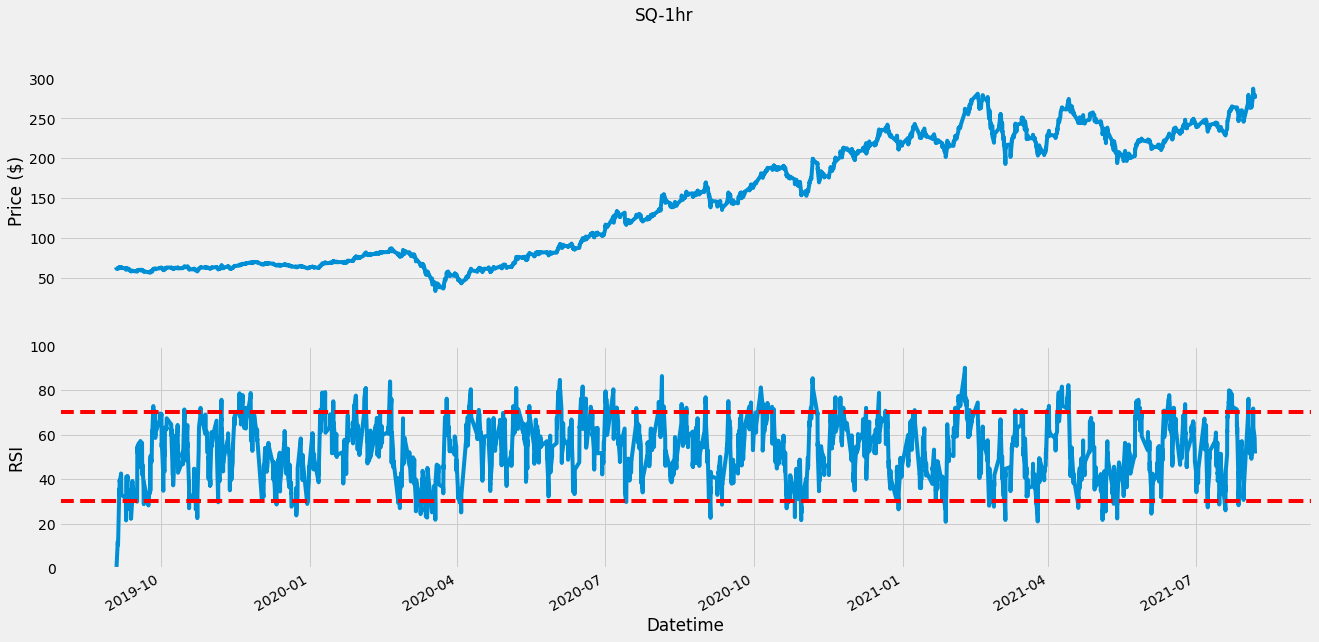

In [15]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('SQ-1hr')
sq_1hr_rsi['Close'].plot(ax=ax1)

ax1.set_ylabel('Price ($)')
sq_1hr_rsi['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color= 'r', linestyle= '--')
ax2.axhline(70, color= 'r', linestyle= '--')
ax2.set_ylabel('RSI')
plt.show()

In [16]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(sq_1hr_rsi['Close'], sq_1hr_rsi['RSI'])

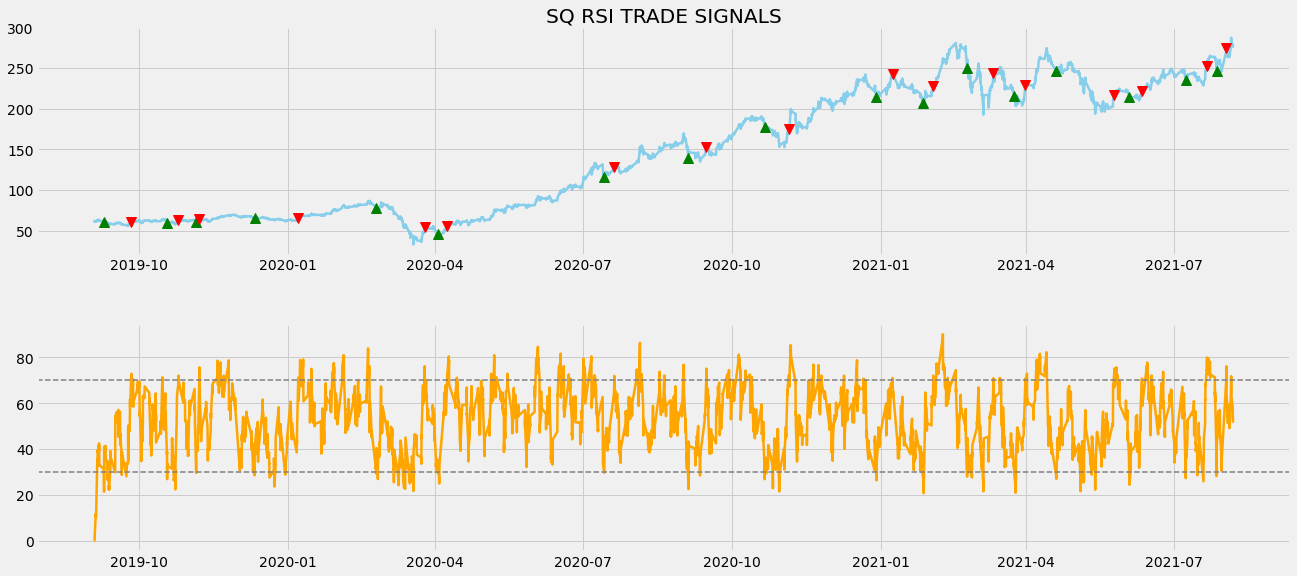

In [17]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(sq_1hr_rsi['Close'], linewidth = 2.5, color = 'skyblue', label = 'SQ')
ax1.plot(sq_1hr_rsi.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(sq_1hr_rsi.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('SQ RSI TRADE SIGNALS')
ax2.plot(sq_1hr['RSI'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

In [18]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(sq_1hr_rsi['Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
rsi = sq_1hr_rsi['RSI']
close_price = sq_1hr_rsi['Close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(sq_1hr_rsi.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(sq_1hr_rsi.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,RSI,rsi_signal,rsi_position
Datetime,,,,
2019-09-03 09:30:00-04:00,62.959999,NaN,0,1
2019-09-03 10:30:00-04:00,62.320000,0.000000,0,1
2019-09-03 11:30:00-04:00,62.000000,0.000000,0,1
2019-09-03 12:30:00-04:00,61.774899,0.000000,0,1
2019-09-03 13:30:00-04:00,61.360001,0.000000,0,1
...,...,...,...,...
2021-08-06 11:30:00-04:00,278.640015,57.387102,0,0
2021-08-06 12:30:00-04:00,276.611908,54.168932,0,0
2021-08-06 13:30:00-04:00,276.234985,53.567697,0,0


In [19]:
sq_1hr_rsi_ret = pd.DataFrame(np.diff(sq_1hr_rsi['Close'])).rename(columns = {0:'returns'})
rsi_strategy_ret = []

for i in range(len(sq_1hr_rsi_ret)):
    returns = sq_1hr_rsi_ret['returns'][i]*strategy['rsi_position'][i]
    rsi_strategy_ret.append(returns)
    
rsi_strategy_ret_df = pd.DataFrame(rsi_strategy_ret).rename(columns = {0:'rsi_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/sq_1hr_rsi['Close'][-1])
rsi_investment_ret = []

for i in range(len(rsi_strategy_ret_df['rsi_returns'])):
    returns = number_of_stocks*rsi_strategy_ret_df['rsi_returns'][i]
    rsi_investment_ret.append(returns)

rsi_investment_ret_df = pd.DataFrame(rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the RSI strategy by investing $100k in SQ : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the RSI strategy : {}%'.format(profit_percentage), attrs = ['bold']))


Profit gained from the RSI strategy by investing $100k in SQ : 35348.03
Profit percentage of the RSI strategy : 35%


In [20]:
strategy.to_csv('SQ RSI TRADE STRATEGY.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>